In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('WA_statewide_metrics_concise.csv')
data = data.drop('Unnamed: 0', axis=1)


In [2]:
data

,schoolyear,OrganizationLevel,StudentGroupType,StudentGroup,Domain,Measure,MeasureValue,Numerator,Denominator,Percent,DevelopmentLevel,Suppress,DataAsOf
0,2011-12,State,All,All Students,Cognitive,CognitiveReadinessFlag,NaN,506.0,6661.0,0.07596,NaN,NaN,NaN
1,2011-12,State,All,All Students,Cognitive,CognitiveReadinessFlag,N,1377.0,6661.0,0.20673,NaN,NaN,NaN
2,2011-12,State,All,All Students,Cognitive,CognitiveReadinessFlag,Y,4778.0,6661.0,0.71731,NaN,NaN,NaN
3,2011-12,State,All,All Students,Literacy,LiteracyDevelopmentLevel,0-2 year olds,16.0,5902.0,0.00271,NaN,NaN,NaN
4,2011-12,State,All,All Students,Literacy,LiteracyDevelopmentLevel,2-year olds,157.0,5902.0,0.02660,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalDevelopmentLevel,orange,231.0,6740.0,0.03427,0-2 Year Olds,NaN,01/31/2024 01:05:15 PM
2778,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalDevelopmentLevel,purple,3469.0,6740.0,0.51469,Kindergarten and Up,NaN,01/31/2024 01:05:15 PM
2779,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalDevelopmentLevel,Yellow,236.0,6740.0,0.03501,2 Year Olds,NaN,01/31/2024 01:05:15 PM
2780,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalReadinessFlag,N,1530.0,6748.0,0.22673,NaN,NaN,01/31/2024 01:05:15 PM


#### What measures are in the data?

In [3]:
print("Measures in the data:")
for measure in data.Measure.unique():
    print("- " + measure)

Measures in the data:
- CognitiveReadinessFlag
- LiteracyDevelopmentLevel
- LiteracyReadinessFlag
- MathDevelopmentLevel
- MathReadinessFlag
- SocialEmotionalDevelopmentLevel
- SocialEmotionalReadinessFlag
- CognitiveDevelopmentLevel


#### How does each measure change over time?

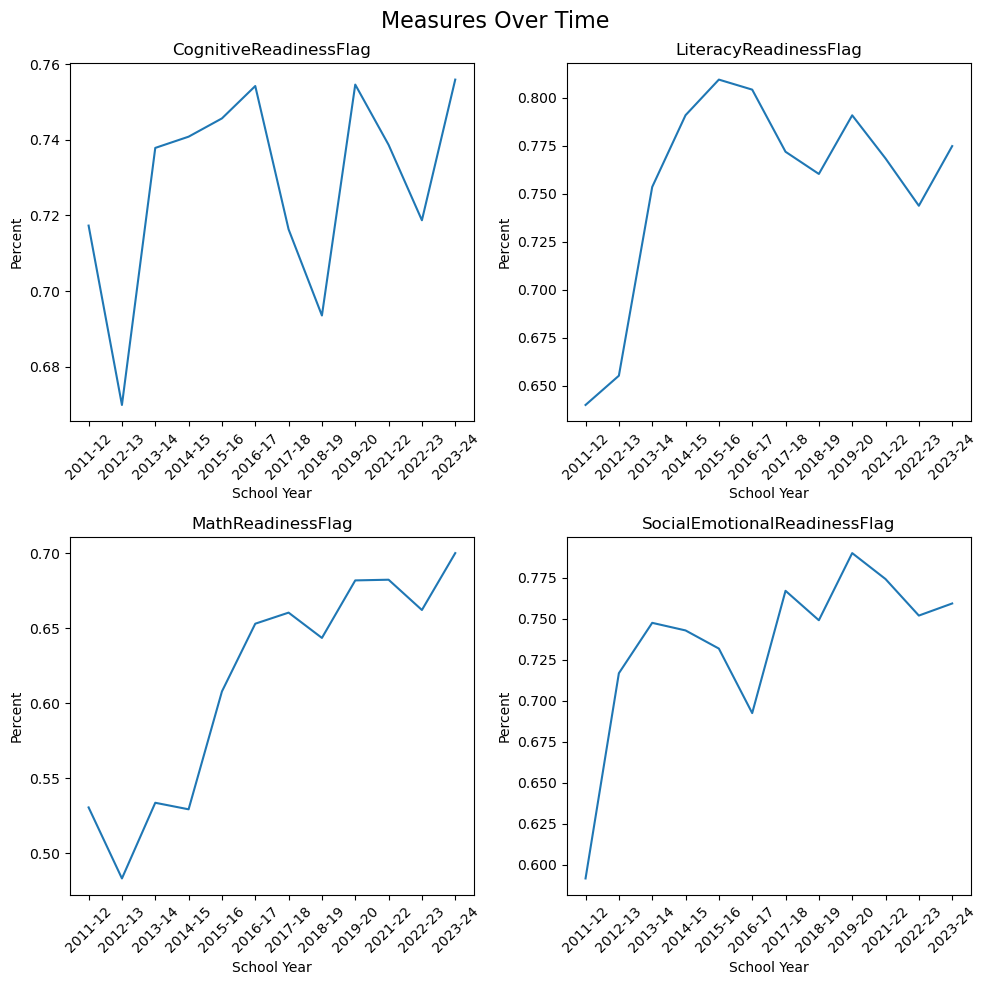

In [4]:
unique_measures = [
       'CognitiveReadinessFlag',
       'LiteracyReadinessFlag', 
       'MathReadinessFlag',
       'SocialEmotionalReadinessFlag',
]

plt.figure(figsize=(10, 10))
plt.suptitle('Measures Over Time', fontsize=16)  # Adding an overall title for the whole plot

for i, measure in enumerate(unique_measures):
    measure_data = data[
        (data['StudentGroup'] == 'All Students') & 
        (data['Measure'] == unique_measures[i]) &
        (data['MeasureValue'] == 'Y')
    ][['schoolyear', 'Percent']]
    if not measure_data.empty:
        plt.subplot(2, 2, i+1)
        sns.lineplot(x='schoolyear', y='Percent', data=measure_data)
        plt.title(measure)
        plt.xlabel('School Year')
        plt.ylabel('Percent')
        plt.xticks(rotation=45)  # Make x-ticks horizontal

plt.tight_layout()
plt.show()



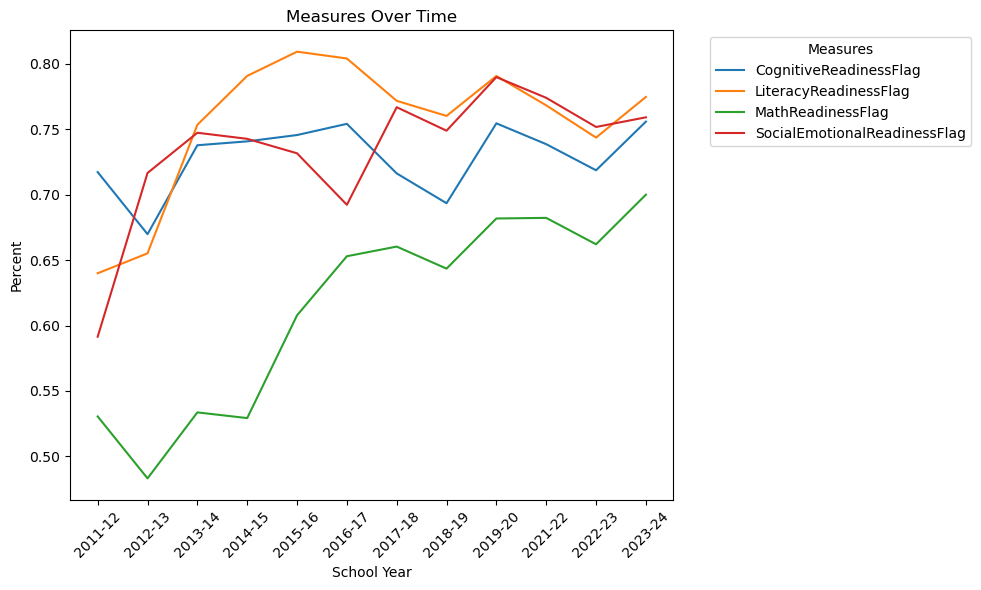

In [5]:
plt.figure(figsize=(10, 6))

for i, measure in enumerate(unique_measures):
    measure_data = data[
        (data['StudentGroup'] == 'All Students') & 
        (data['Measure'] == unique_measures[i]) &
        (data['MeasureValue'] == 'Y')
    ][['schoolyear', 'Percent']]
    if not measure_data.empty:
        sns.lineplot(x='schoolyear', y='Percent', data=measure_data, label=measure)

plt.title('Measures Over Time')
plt.xlabel('School Year')
plt.ylabel('Percent')
plt.xticks(rotation=45)  # Make x-ticks horizontal
plt.legend(title='Measures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### What are the unique student groups?

In [6]:
unique_student_groups = data['StudentGroup'].unique()
print("Unique Student Groups:")
for group in unique_student_groups:
    print("- " + group)


Unique Student Groups:
- All Students
- American Indian/ Alaskan Native
- Black/ African American
- Hispanic/ Latino of any race(s)
- White
- Asian
- Native Hawaiian/ Other Pacific Islander
- TwoorMoreRaces


#### How does math readiness compare agross groups?

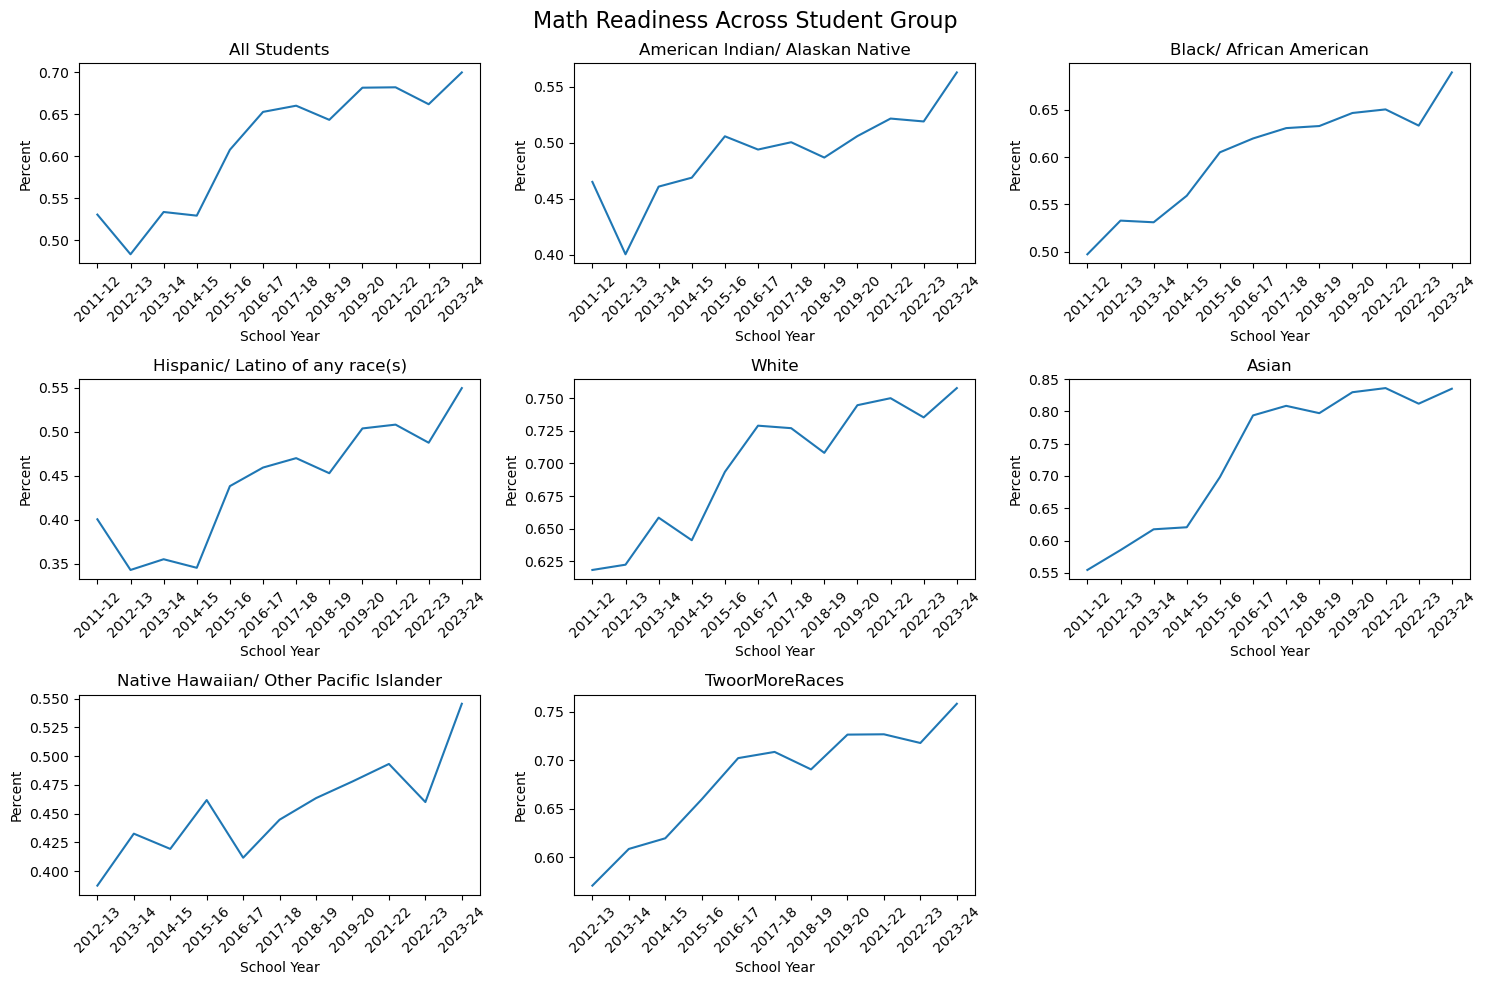

In [7]:
plt.figure(figsize=(15, 10))
plt.suptitle('Math Readiness Across Student Group', fontsize=16)  

for i, group in enumerate(unique_student_groups):
    measure_data = data[
        (data['StudentGroup'] == group) & 
        (data['Measure'] == 'MathReadinessFlag') &
        (data['MeasureValue'] == 'Y')
    ][['schoolyear', 'Percent']]
    if not measure_data.empty:
        plt.subplot(3, 3, i+1)
        sns.lineplot(x='schoolyear', y='Percent', data=measure_data)
        plt.title(group)
        plt.xlabel('School Year')
        plt.ylabel('Percent')
        plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

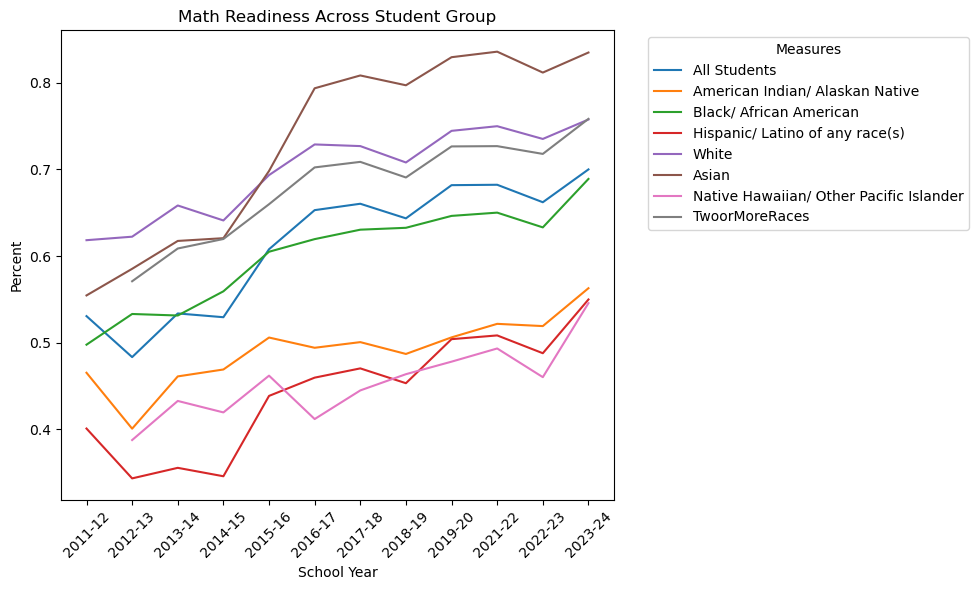

In [8]:
plt.figure(figsize=(10, 6))

for i, measure in enumerate(unique_student_groups):
    measure_data = data[
        (data['StudentGroup'] == unique_student_groups[i]) & 
        (data['Measure'] == 'MathReadinessFlag') &
        (data['MeasureValue'] == 'Y')
    ][['schoolyear', 'Percent']]
    if not measure_data.empty:
        sns.lineplot(x='schoolyear', y='Percent', data=measure_data, label=measure)

plt.title('Math Readiness Across Student Group')
plt.xlabel('School Year')
plt.ylabel('Percent')
plt.xticks(rotation=45)  # Make x-ticks horizontal
plt.legend(title='Measures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


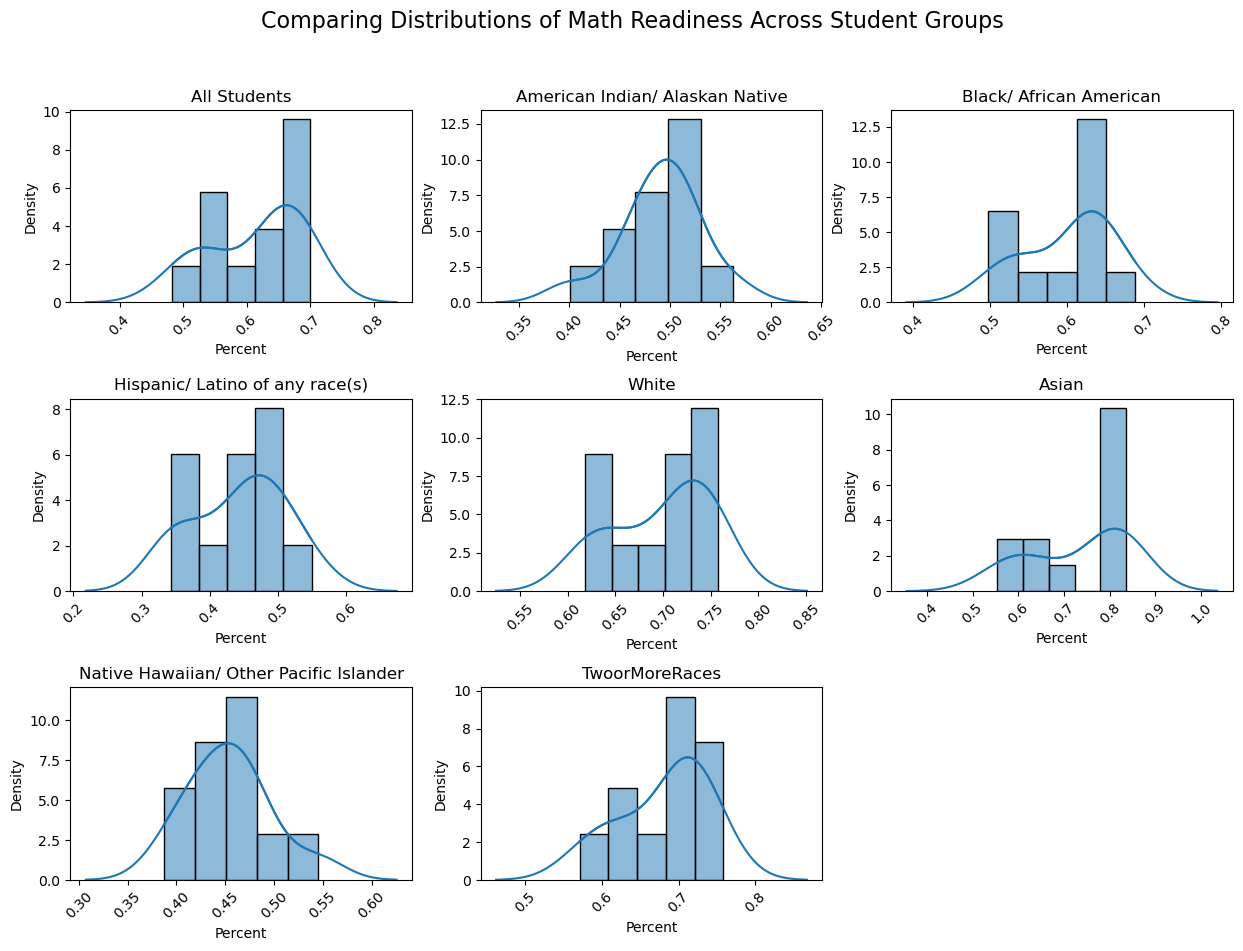

In [9]:
plt.figure(figsize=(15, 10))
plt.suptitle('Comparing Distributions of Math Readiness Across Student Groups', fontsize=16)  

for i, measure in enumerate(unique_student_groups):
    measure_data = data[
        (data['StudentGroup'] == unique_student_groups[i]) & 
        (data['Measure'] == 'MathReadinessFlag') &
        (data['MeasureValue'] == 'Y')
    ][['schoolyear', 'Percent']]
    if not measure_data.empty:
        plt.subplot(3, 3, i+1)
        sns.histplot(data=measure_data, x='Percent', kde=True, stat='density')
        sns.kdeplot(data=measure_data['Percent'], label=unique_student_groups[i])
        plt.xlabel('Percent')
        plt.ylabel('Density')
        plt.xticks(rotation=45)  
        plt.title(unique_student_groups[i]) 
        plt.subplots_adjust(hspace=0.5)  # Add space between subplots vertically

plt.show()

#### How does math litteracy readiness compare agross groups?

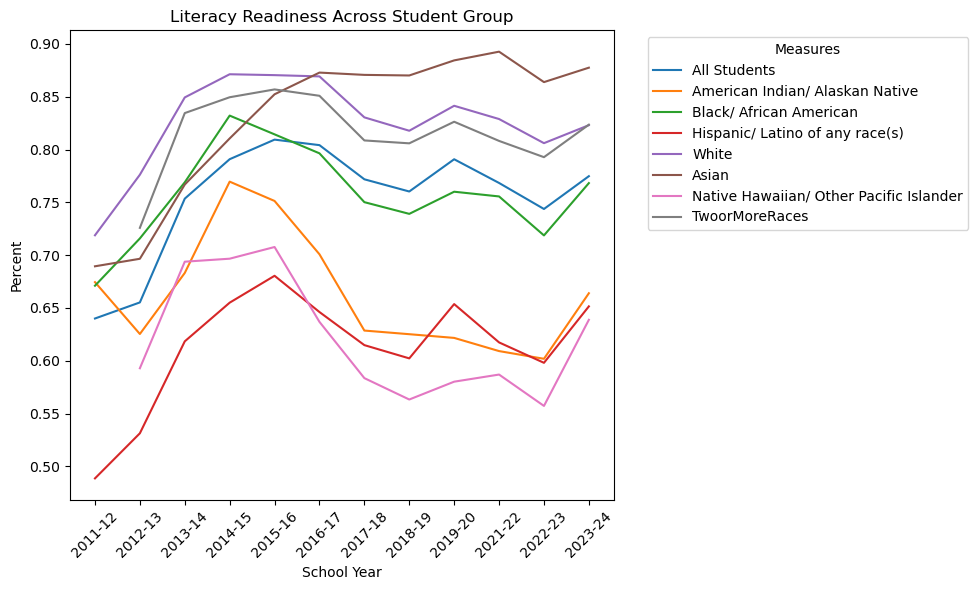

In [10]:
plt.figure(figsize=(10, 6))

for i, measure in enumerate(unique_student_groups):
    measure_data = data[
        (data['StudentGroup'] == unique_student_groups[i]) & 
        (data['Measure'] == 'LiteracyReadinessFlag') &
        (data['MeasureValue'] == 'Y')
    ][['schoolyear', 'Percent']]
    if not measure_data.empty:
        sns.lineplot(x='schoolyear', y='Percent', data=measure_data, label=measure)

plt.title('Literacy Readiness Across Student Group')
plt.xlabel('School Year')
plt.ylabel('Percent')
plt.xticks(rotation=45)  # Make x-ticks horizontal
plt.legend(title='Measures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

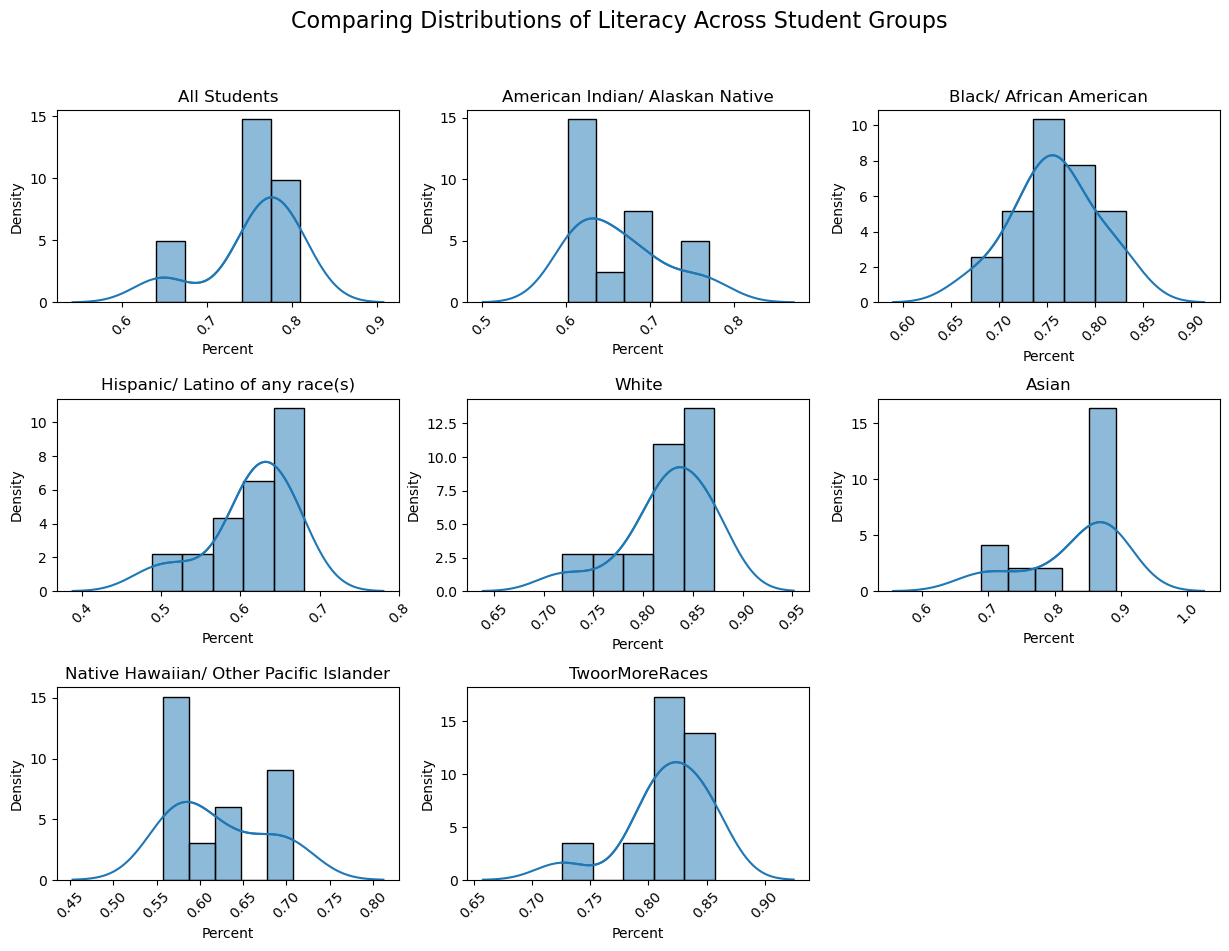

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Comparing Distributions of Literacy Across Student Groups', fontsize=16)  

for i, measure in enumerate(unique_student_groups):
    measure_data = data[
        (data['StudentGroup'] == unique_student_groups[i]) & 
        (data['Measure'] == 'LiteracyReadinessFlag') &
        (data['MeasureValue'] == 'Y')
    ][['schoolyear', 'Percent']]
    if not measure_data.empty:
        plt.subplot(3, 3, i+1)
        sns.histplot(data=measure_data, x='Percent', kde=True, stat='density')
        sns.kdeplot(data=measure_data['Percent'], label=unique_student_groups[i])
        plt.xlabel('Percent')
        plt.ylabel('Density')
        plt.xticks(rotation=45)  
        plt.title(unique_student_groups[i]) 
        plt.subplots_adjust(hspace=0.5)  # Add space between subplots vertically

plt.show()



In [12]:
import pandas as pd
from itertools import product  # Changed from combinations to product
from scipy import stats

results = {'Measure':[], 'Group1':[], 'Group2':[], 'KS-Stat':[], 'P-Value':[]}

all_groups = list(product(unique_student_groups, repeat=2))  # Using product with repeat=2 for combinations with repetition
for measure in unique_measures:
    for group_pair in all_groups:
        
        a_i = np.where(unique_student_groups == group_pair[0])[0][0]
        b_i = np.where(unique_student_groups == group_pair[1])[0][0]

        a = data[
                (data['StudentGroup'] == group_pair[0]) & 
                (data['Measure'] == measure) &
                (data['MeasureValue'] == 'Y')
            ]['Percent']

        b = data[
                (data['StudentGroup'] == group_pair[1]) & 
                (data['Measure'] == measure) &
                (data['MeasureValue'] == 'Y')
            ]['Percent']

        # a_norm = (a - np.mean(a)) / np.std(a)
        # b_norm = (b - np.mean(b)) / np.std(b)

        ks_statistic, p_value = stats.ks_2samp(a, b)
        results['Measure'].append(measure)
        results['Group1'].append(group_pair[0])
        results['Group2'].append(group_pair[1])
        results['KS-Stat'].append(ks_statistic)
        results['P-Value'].append(p_value)

ks_tests = pd.DataFrame(results)
ks_tests

,Measure,Group1,Group2,KS-Stat,P-Value
0,CognitiveReadinessFlag,All Students,All Students,0.000000,1.000000
1,CognitiveReadinessFlag,All Students,American Indian/ Alaskan Native,0.750000,0.001497
2,CognitiveReadinessFlag,All Students,Black/ African American,0.750000,0.001497
3,CognitiveReadinessFlag,All Students,Hispanic/ Latino of any race(s),0.916667,0.000018
4,CognitiveReadinessFlag,All Students,White,0.916667,0.000018
...,...,...,...,...,...
251,SocialEmotionalReadinessFlag,TwoorMoreRaces,Hispanic/ Latino of any race(s),0.825758,0.000278
252,SocialEmotionalReadinessFlag,TwoorMoreRaces,White,0.325758,0.436704
253,SocialEmotionalReadinessFlag,TwoorMoreRaces,Asian,0.500000,0.058926
254,SocialEmotionalReadinessFlag,TwoorMoreRaces,Native Hawaiian/ Other Pacific Islander,0.727273,0.004366


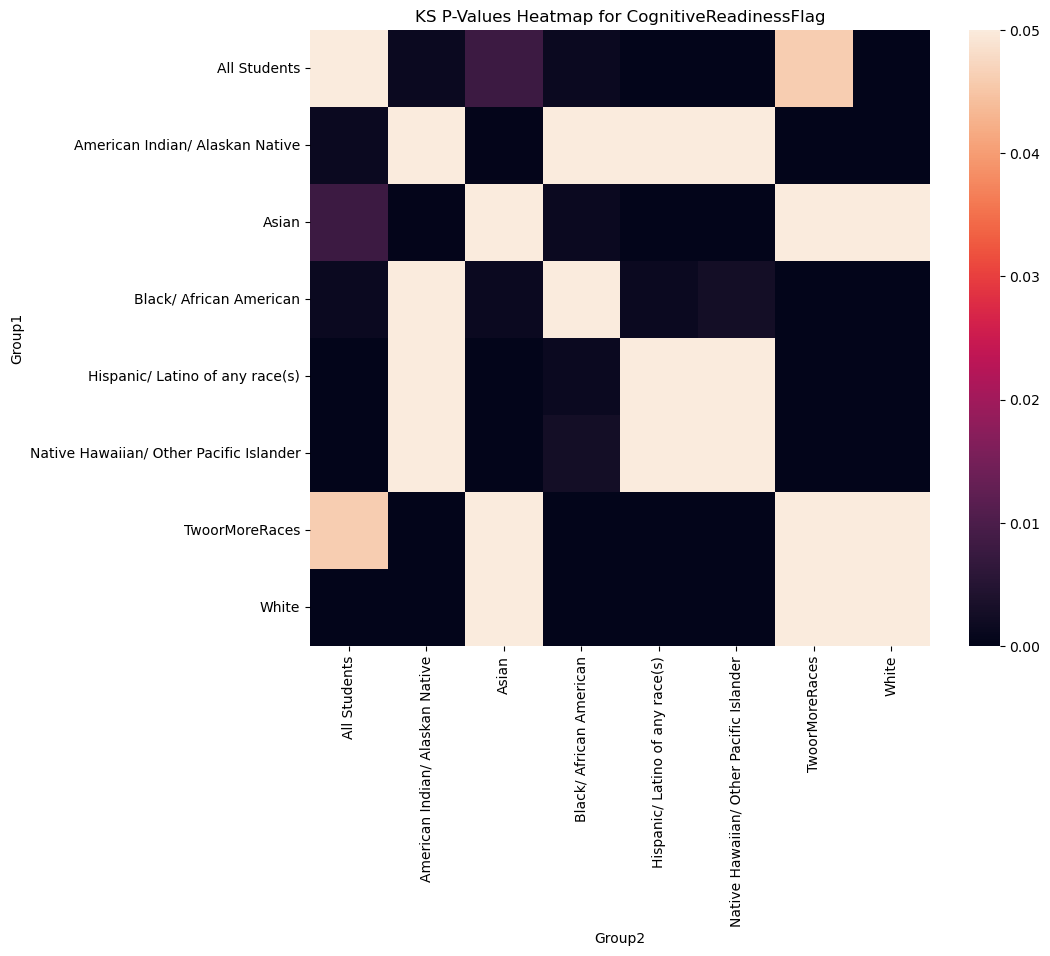

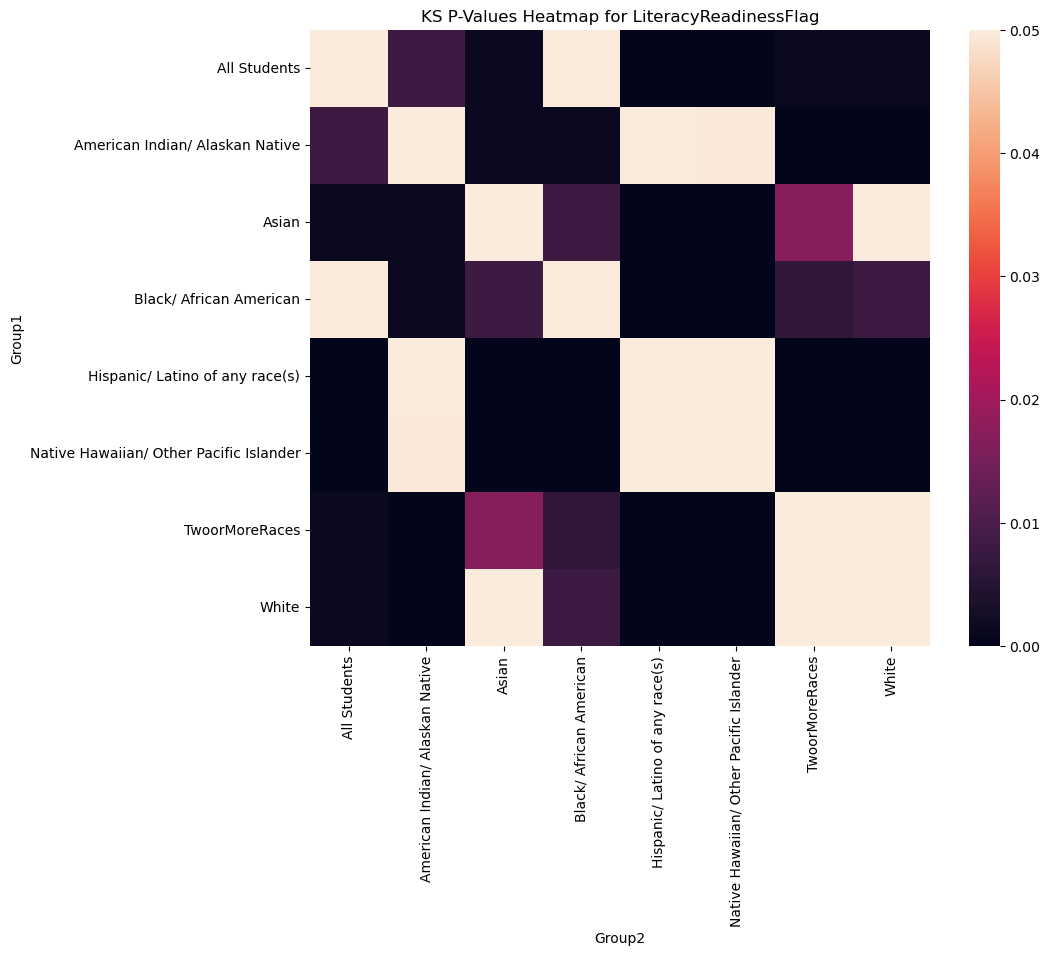

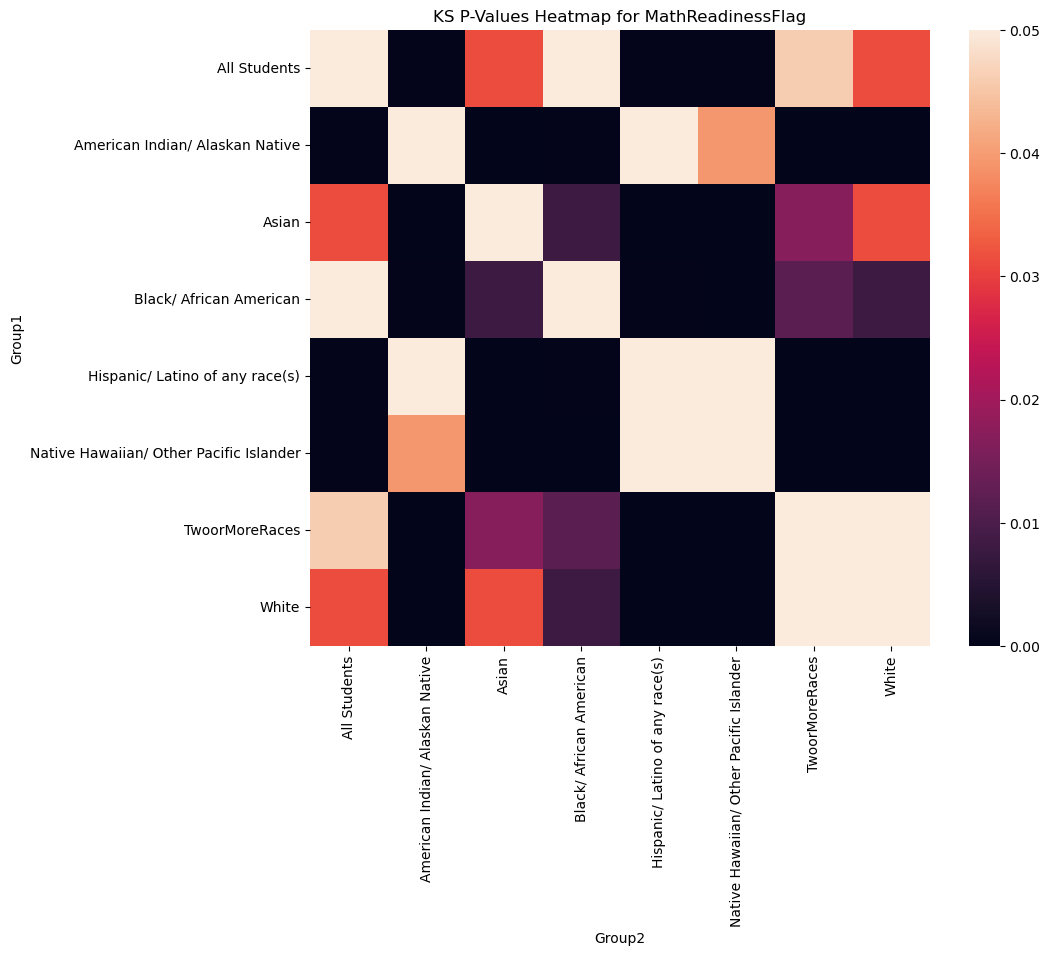

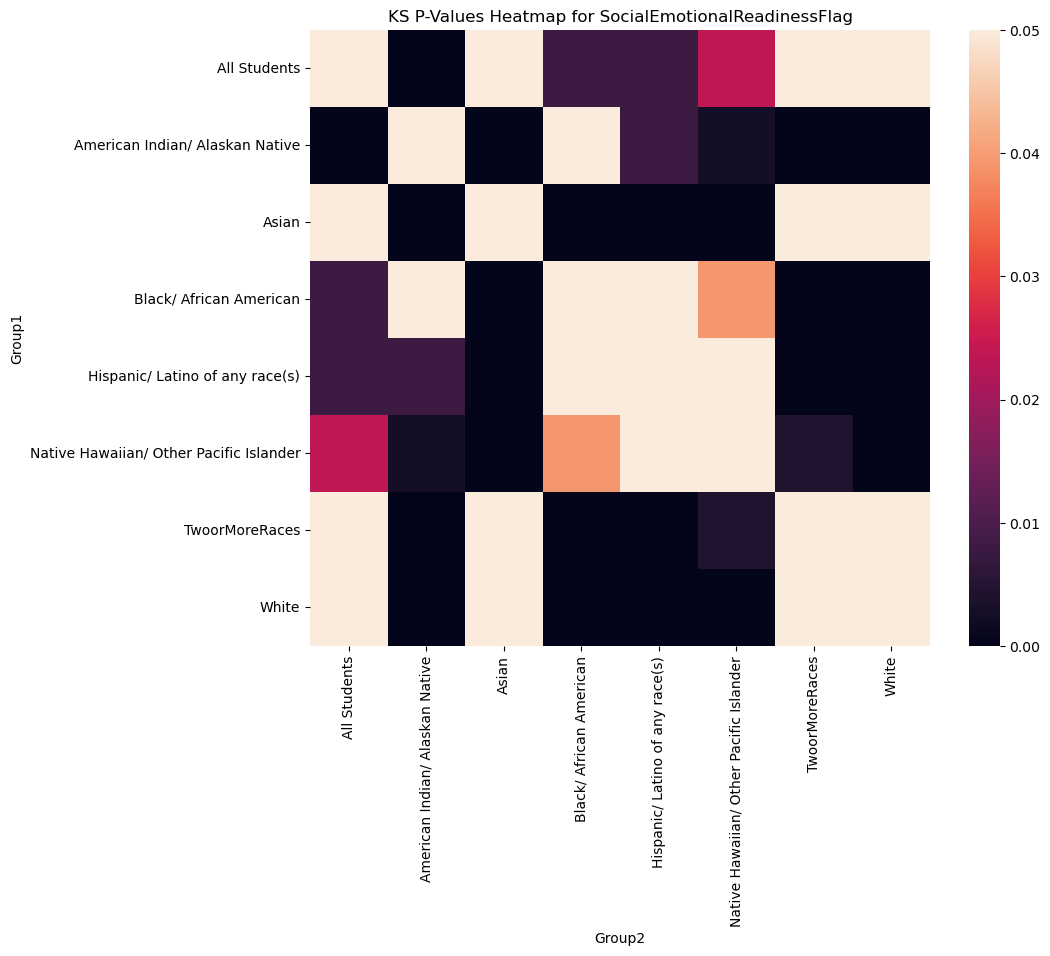

In [13]:
for measure in unique_measures:
    p_value_df = ks_tests[ks_tests['Measure']==measure] \
        .pivot_table(index='Group1', columns='Group2', values='P-Value')

    plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
    plt.title(f'KS P-Values Heatmap for {measure}')
    sns.heatmap(p_value_df, vmin=0, vmax=.05)
    plt.show()  # Display the heatmap for each measure
